In [1]:
import pandas as pd

df = pd.read_csv("reddit_with_emotions_full.csv")  # or read_excel if it’s xlsx

# quick peek
print(df.shape)
print(df.columns)

# check missing values
df.isna().sum().sort_values(ascending=False).head(20)

# basic counts
print(df['finance_label'].value_counts())
print(df['top_emotion'].value_counts().head(20))


(106963, 44)
Index(['author', 'title', 'score', 'created', 'link', 'text', 'url', 'year',
       'year_month', 'finance_label', 'finance_score', 'combined_text',
       'emotions', 'top_emotion', 'top_emotion_score', 'emotion_admiration',
       'emotion_amusement', 'emotion_anger', 'emotion_annoyance',
       'emotion_approval', 'emotion_caring', 'emotion_confusion',
       'emotion_curiosity', 'emotion_desire', 'emotion_disappointment',
       'emotion_disapproval', 'emotion_disgust', 'emotion_embarrassment',
       'emotion_excitement', 'emotion_fear', 'emotion_gratitude',
       'emotion_grief', 'emotion_joy', 'emotion_love', 'emotion_nervousness',
       'emotion_optimism', 'emotion_pride', 'emotion_realization',
       'emotion_relief', 'emotion_remorse', 'emotion_sadness',
       'emotion_surprise', 'emotion_neutral', 'num_emotions'],
      dtype='object')
finance_label
not finance    99526
finance         7437
Name: count, dtype: int64
top_emotion
sadness           24327
disapp

In [2]:
emotion_counts = df['top_emotion'].value_counts().reset_index()
emotion_counts.columns = ['emotion', 'count']
emotion_counts['percent'] = 100 * emotion_counts['count'] / len(df)

emotion_counts.head(20)


,emotion,count,percent
0,sadness,24327,22.743379
1,disappointment,15830,14.799510
2,curiosity,12613,11.791928
3,fear,11606,10.850481
4,confusion,8103,7.575517
5,neutral,7065,6.605088
6,annoyance,5284,4.940026
7,love,2565,2.398025
8,realization,2194,2.051177
9,joy,1857,1.736114


<Figure size 1000x500 with 0 Axes>

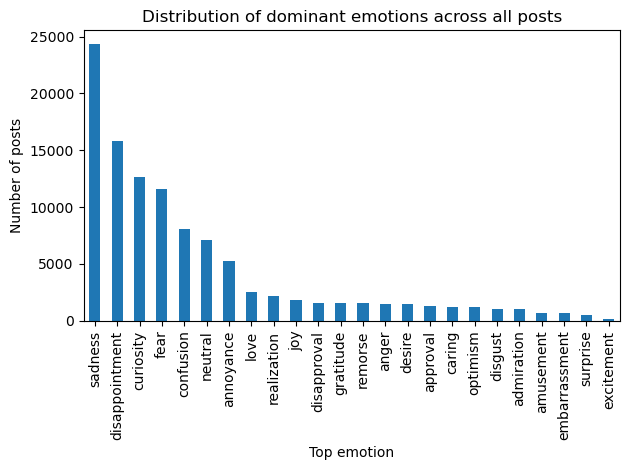

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
emotion_counts.sort_values('count', ascending=False).plot(
    x='emotion', y='count', kind='bar', legend=False
)
plt.ylabel("Number of posts")
plt.xlabel("Top emotion")
plt.title("Distribution of dominant emotions across all posts")
plt.tight_layout()
plt.show()


In [4]:
# simple check
df['finance_label'].value_counts()

# contingency table: finance_label x top_emotion
ct = pd.crosstab(df['finance_label'], df['top_emotion'])
ct


top_emotion,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,fear,gratitude,joy,love,neutral,optimism,realization,remorse,sadness,surprise
finance_label,,,,,,,,,,,,,,,,,,,,,
finance,118,25,66,324,98,82,329,523,84,1482,...,641,122,149,176,564,94,145,111,2070,27
not finance,935,700,1451,4960,1167,1166,7774,12090,1417,14348,...,10965,1416,1708,2389,6501,1081,2049,1426,22257,465


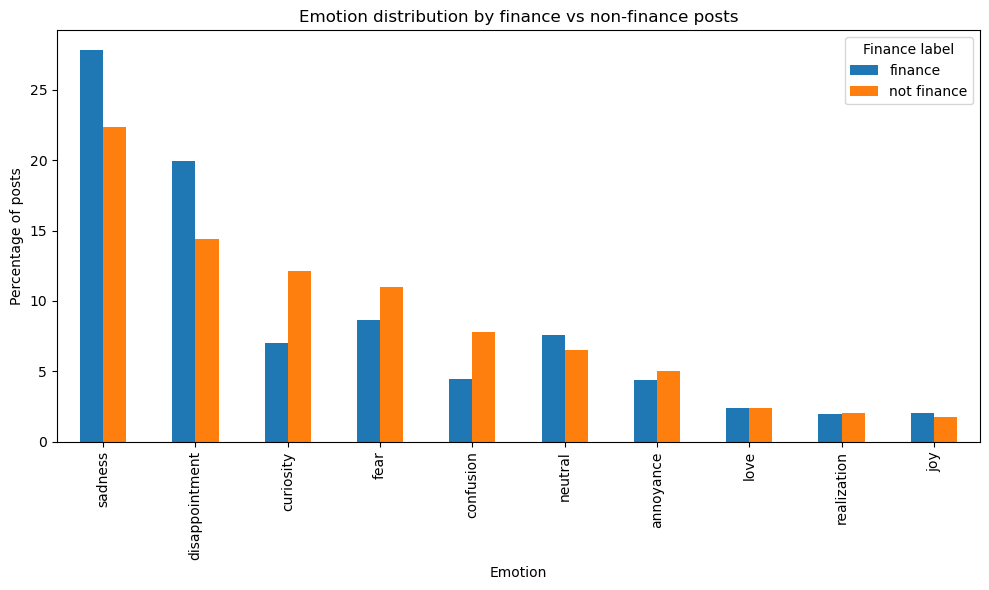

In [6]:
# convert counts to percentages within each group
row_perc = ct.div(ct.sum(axis=1), axis=0) * 100

main_emotions = emotion_counts['emotion'].head(10).tolist()
row_perc[main_emotions].T.plot(kind='bar', figsize=(10, 6))
plt.ylabel("Percentage of posts")
plt.xlabel("Emotion")
plt.title("Emotion distribution by finance vs non-finance posts")
plt.legend(title="Finance label")
plt.tight_layout()
plt.show()


In [7]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct)
print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 648.6285272649825
p-value: 2.8573924167481123e-122


In [8]:
def emotion_prop(df_sub, emotion):
    return (df_sub['top_emotion'] == emotion).mean() * 100

finance = df[df['finance_label'] == 'finance']
non_finance = df[df['finance_label'] == 'not finance']

for emo in ['sadness', 'fear', 'joy', 'neutral', 'anger']:
    p_fin = emotion_prop(finance, emo)
    p_non = emotion_prop(non_finance, emo)
    diff = p_fin - p_non
    print(f"{emo}: finance={p_fin:.1f}%, non-finance={p_non:.1f}%, diff={diff:.1f} pts")


sadness: finance=27.8%, non-finance=22.4%, diff=5.5 pts
fear: finance=8.6%, non-finance=11.0%, diff=-2.4 pts
joy: finance=2.0%, non-finance=1.7%, diff=0.3 pts
neutral: finance=7.6%, non-finance=6.5%, diff=1.1 pts
anger: finance=0.9%, non-finance=1.5%, diff=-0.6 pts
